In [184]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import math, gillespy2
from gillespy2.solvers.cpp.ssa_c_solver import SSACSolver
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver

Using matplotlib backend: TkAgg


In [185]:
class DayModel(gillespy2.Model):
    def __init__(self, parameter_values=None, init_v=0, spore=3.256e6, macrophage=1e6):
        # initialize
        gillespy2.Model.__init__(self, name="Macrophage")
        
        # species
        #S_ = gillespy2.Species(name='S_', initial_value=3.256e6) # low = 4e3; mid = 2e4; high = 1e7
        S_ = gillespy2.Species(name='S_', initial_value=spore) # low = 4e3; mid = 2e4; high = 1e7
        
        #A_ = gillespy2.Species(name='A_', initial_value=1e6) # A = Sa/(k2*S+MuA)
        A_ = gillespy2.Species(name='A_', initial_value=macrophage) # A = Sa/(k2*S+MuA)
        
        H1 = gillespy2.Species(name='H1', initial_value=0)
        H2 = gillespy2.Species(name='H2', initial_value=0)
        H3 = gillespy2.Species(name='H3', initial_value=0)
        H4 = gillespy2.Species(name='H4', initial_value=0)
        H5 = gillespy2.Species(name='H5', initial_value=0)
        H6 = gillespy2.Species(name='H6', initial_value=0)
        
        HLN1 = gillespy2.Species(name='HLN1', initial_value=0)
        HLN2 = gillespy2.Species(name='HLN2', initial_value=0)
        HLN3 = gillespy2.Species(name='HLN3', initial_value=0)
        HLN4 = gillespy2.Species(name='HLN4', initial_value=0)
        HLN5 = gillespy2.Species(name='HLN5', initial_value=0)
        HLN6 = gillespy2.Species(name='HLN6', initial_value=0)
        
        self.add_species([S_,A_,H1,H2,H3,H4,H5,H6,HLN1,HLN2,HLN3,HLN4,HLN5,HLN6])
        
        # parameters        
        # rate of phagocytosis
        k2 = gillespy2.Parameter(name='k2', expression=1e-10)
        
        # migration to TMLN
        k3 = gillespy2.Parameter(name='k3', expression=0.05)
        
        self.add_parameter([k2,k3])
        
        # reactions
        R1 = gillespy2.Reaction(
            name='R1',
            reactants={S_:1, A_:1},
            products={H1:1},
            rate=k2
        )
        
        R2 = gillespy2.Reaction(
            name='R2',
            reactants={S_:1, H1:1},
            products={H2:1},
            rate=k2
        )
        
        R3 = gillespy2.Reaction(
            name='R3',
            reactants={S_:1, H2:1},
            products={H3:1},
            rate=k2
        )
        
        R4 = gillespy2.Reaction(
            name='R4',
            reactants={S_:1, H3:1},
            products={H4:1},
            rate=k2
        )
        
        R5 = gillespy2.Reaction(
            name='R5',
            reactants={S_:1, H4:1},
            products={H5:1},
            rate=k2
        )
        
        R6 = gillespy2.Reaction(
            name='R6',
            reactants={S_:1, H5:1},
            products={H6:1},
            rate=k2
        )
        
        # To the lung
        R7 = gillespy2.Reaction(
            name='R7',
            reactants={H1:1},
            products={HLN1:1},
            rate=k3
        )
        
        R8 = gillespy2.Reaction(
            name='R8',
            reactants={H2:1},
            products={HLN2:1},
            rate=k3
        )
        
        R9 = gillespy2.Reaction(
            name='R9',
            reactants={H3:1},
            products={HLN3:1},
            rate=k3
        )
        
        R10 = gillespy2.Reaction(
            name='R10',
            reactants={H4:1},
            products={HLN4:1},
            rate=k3
        )
        
        R11 = gillespy2.Reaction(
            name='R11',
            reactants={H5:1},
            products={HLN5:1},
            rate=k3
        )
        
        R12 = gillespy2.Reaction(
            name='R12',
            reactants={H6:1},
            products={HLN6:1},
            rate=k3
        )
                
        self.add_reaction([R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12])
        t = numpy.linspace(0,10000,201)
        self.timespan(t)
        #print(t)

In [186]:
model = DayModel(spore=1.61e9, macrophage=1e6)

In [187]:
#%time results = model.run(solver=SSACSolver, seed=123)
%time results = model.run(solver=BasicODESolver)

#results = []

#for i in numpy.arange(3e6, 5e6, 10000):
#    model = DayModel(spore=i, macrophage=1e6)
#    results.insert(int(i),model.run(solver=BasicODESolver))

CPU times: user 109 ms, sys: 0 ns, total: 109 ms
Wall time: 106 ms


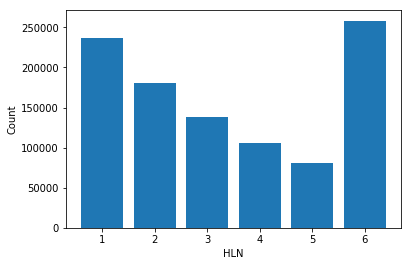

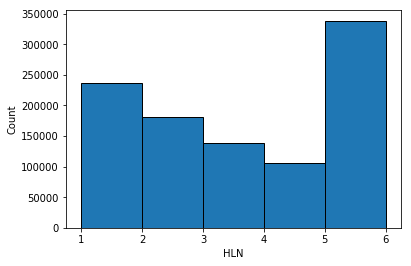

Mean: 	3.385480541922168
STD:  	1.9317358185304427
SEM:  	0.0019317406478880992


In [188]:
from scipy import stats
res = results[0]
data = [
    res['HLN1'][-1],
    res['HLN2'][-1],
    res['HLN3'][-1],
    res['HLN4'][-1],
    res['HLN5'][-1],
    res['HLN6'][-1]
]
x = [1,2,3,4,5,6]

#means = []

# for i in range(0, 199):
#     data3 = []
#     r = results[i][0]
#     data3.extend([1]*int(r['HLN1'][-1]))
#     data3.extend([2]*int(r['HLN2'][-1]))
#     data3.extend([3]*int(r['HLN3'][-1]))
#     data3.extend([4]*int(r['HLN4'][-1]))
#     data3.extend([5]*int(r['HLN5'][-1]))
#     data3.extend([6]*int(r['HLN6'][-1]))
#     mean = numpy.mean(data3)
#     sd = numpy.std(data3)
#     sem = stats.sem(data3)
#     means.append(mean)

r = results[0]
data3 = []
data3.extend([1]*int(r['HLN1'][-1]))
data3.extend([2]*int(r['HLN2'][-1]))
data3.extend([3]*int(r['HLN3'][-1]))
data3.extend([4]*int(r['HLN4'][-1]))
data3.extend([5]*int(r['HLN5'][-1]))
data3.extend([6]*int(r['HLN6'][-1]))

mean = numpy.mean(data3)
sd = numpy.std(data3)
sem = stats.sem(data3)

plt.bar(x,data)
plt.xlabel('HLN')
plt.ylabel('Count')
plt.show()

plt.hist(data3, bins=x,edgecolor="black")
plt.xlabel('HLN')
plt.ylabel('Count')
plt.show()

print("Mean: \t{}".format(mean))
print("STD:  \t{}".format(sd))
print("SEM:  \t{}".format(sem))

In [189]:
# plt.hist2d(range(0, 199), means)
# plt.ylim(3, 5)
# plt.show()

#n,x2,_ = plt.hist(data3,bins=6,edgecolor='black')
#bin_centers = 0.5*(x2[1:]+x2[:-1])
#plt.plot(bin_centers, n)
#plt.show()

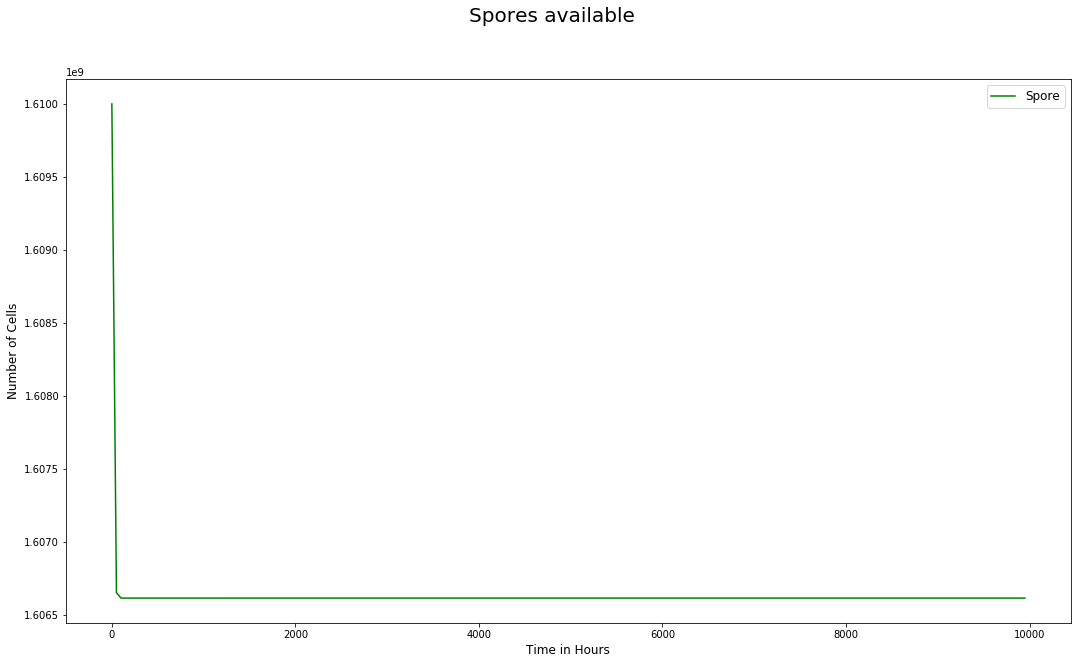

In [190]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Spores available", fontsize=20)

plt.plot(results[0]['time'], results[0]['S_'], 'g-', label='Spore')

plt.xlabel("Time in Hours", fontsize=12)
plt.ylabel("Number of Cells", fontsize=12)
plt.legend(loc='best', fontsize=12)
# print("Initial spores: {}".format(results['S_'][0]))
# print("Spores remaining: {}".format(results['S_'][-1]))
# print("Spores at 5 hours: {}".format(results['S_'][100]))


Lung Hosts at end:
H1: 2.9284672705720186e-27
H2: -2.611457062812687e-25
H3: 1.1077032824783223e-23
H4: -2.9162521172212e-22
H5: 5.1950811997008e-21
H6: 9.978587965978581e-16


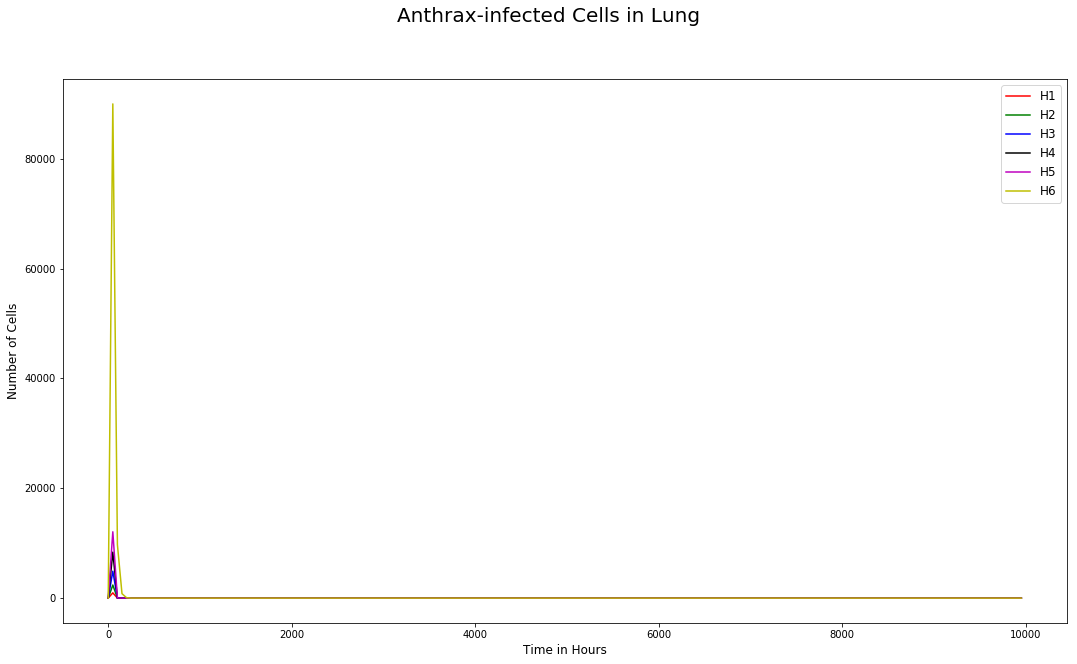

In [191]:
res = results[0]
fig = plt.figure(figsize=(18,10))
fig.suptitle("Anthrax-infected Cells in Lung", fontsize=20)

#plt.plot(results[0]['time'], results[0]['S_'], 'g-', label='Spore')
plt.plot(res['time'], res['H1'], 'r-', label='H1')
plt.plot(res['time'], res['H2'], 'g-', label='H2')
plt.plot(res['time'], res['H3'], 'b-', label='H3')
plt.plot(res['time'], res['H4'], 'k-', label='H4')
plt.plot(res['time'], res['H5'], 'm-', label='H5')
plt.plot(res['time'], res['H6'], 'y-', label='H6')

plt.xlabel("Time in Hours", fontsize=12)
plt.ylabel("Number of Cells", fontsize=12)
plt.legend(loc='best', fontsize=12)

print("Lung Hosts at end:")
print("H1: {}".format(res['H1'][-1]))
print("H2: {}".format(res['H2'][-1]))
print("H3: {}".format(res['H3'][-1]))
print("H4: {}".format(res['H4'][-1]))
print("H5: {}".format(res['H5'][-1]))
print("H6: {}".format(res['H6'][-1]))




k2 = 1.00e-10, k3 = 5.00e-02
Lung Hosts at end:
H1: 2.9284672705720186e-27
H2: -2.611457062812687e-25
H3: 1.1077032824783223e-23
H4: -2.9162521172212e-22
H5: 5.1950811997008e-21
H6: 9.978587965978581e-16
Lymph Node Hosts at end:
HLN1: 237129.70271989307
HLN2: 180939.86955592848
HLN3: 138048.8661610651
HLN4: 105314.90482305277
HLN5: 80336.56403564321
HLN6: 258230.09270441535


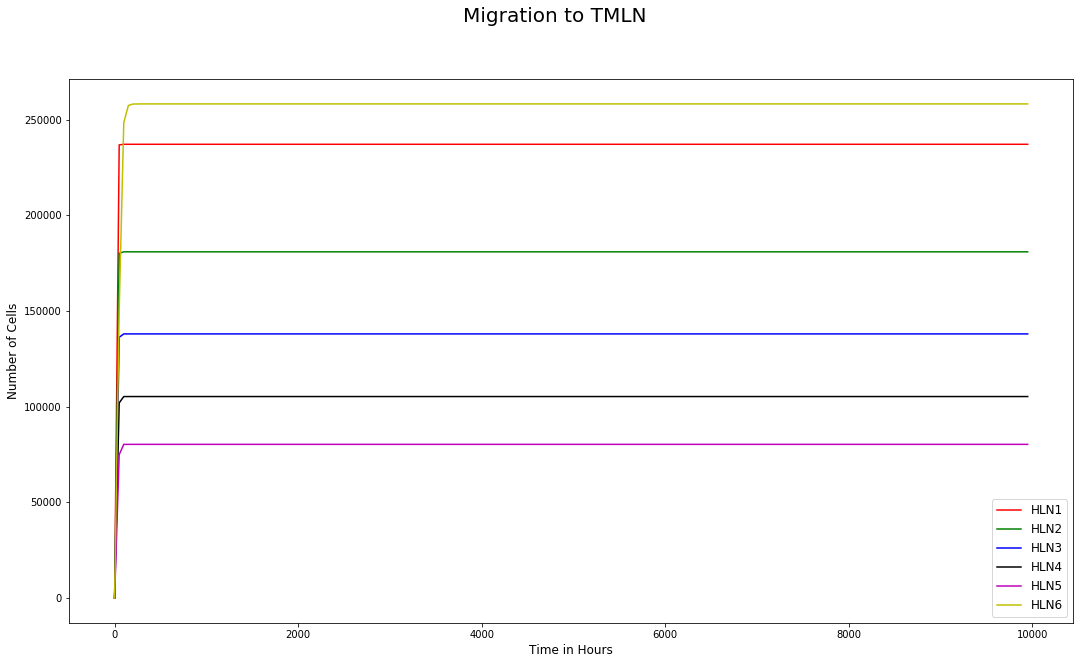

2019-02-25 22:48:08,032 - tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x7ffb2f288e18>)
Traceback (most recent call last):
  File "/home/george/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/george/.local/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/george/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 306, in advance_eventloop
    eventloop(self)
TypeError: 'NoneType' object is not callable


In [192]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Migration to TMLN", fontsize=20)
res = results[0]

#plt.plot(results[0]['time'], results[0]['S_'], 'b', label='Spores')
plt.plot(res['time'], res['HLN1'], 'r-', label='HLN1')
plt.plot(res['time'], res['HLN2'], 'g-', label='HLN2')
plt.plot(res['time'], res['HLN3'], 'b-', label='HLN3')
plt.plot(res['time'], res['HLN4'], 'k-', label='HLN4')
plt.plot(res['time'], res['HLN5'], 'm-', label='HLN5')
plt.plot(res['time'], res['HLN6'], 'y-', label='HLN6')

plt.xlabel("Time in Hours", fontsize=12)
plt.ylabel("Number of Cells", fontsize=12)
plt.legend(loc='best', fontsize=12)

print("k2 = {:.2e}, k3 = {:.2e}".format(float(model.listOfParameters['k2'].expression), float(model.listOfParameters['k3'].expression)))

print("Lung Hosts at end:")
print("H1: {}".format(res['H1'][-1]))
print("H2: {}".format(res['H2'][-1]))
print("H3: {}".format(res['H3'][-1]))
print("H4: {}".format(res['H4'][-1]))
print("H5: {}".format(res['H5'][-1]))
print("H6: {}".format(res['H6'][-1]))

print("Lymph Node Hosts at end:")
print("HLN1: {}".format(res['HLN1'][-1]))
print("HLN2: {}".format(res['HLN2'][-1]))
print("HLN3: {}".format(res['HLN3'][-1]))
print("HLN4: {}".format(res['HLN4'][-1]))
print("HLN5: {}".format(res['HLN5'][-1]))
print("HLN6: {}".format(res['HLN6'][-1]))